# Creating Customer Segments

## #Importing Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

In [2]:
# Import supplementary visualizations code visuals.py
import visuals as vs

In [3]:
# Pretty display for notebooks
%matplotlib inline

In [4]:
data = pd.read_csv("D:\\DScience\\MachineLearningPractical\\Customer Segments\\Wholesale customers data.csv")

In [5]:
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))

Wholesale customers dataset has 440 samples with 6 features each.


## #Data Exploration

In [6]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Selecting Samples


In [8]:
# Select three indices to sample from the dataset
indices = [85,181,338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,16117,46197,92780,1026,40827,2944
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550


### Feature Relevance

In [9]:
#Analyze the relevance of the features for understanding the purchasing behaviours of the customers

In [10]:
data.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338


In [11]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)

In [12]:
# Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data.Grocery, test_size=0.25, random_state=42)

In [13]:
# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)

In [14]:
# Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print("Prediction score is: {}".format(score))

Prediction score is: 0.6983279402566434


In [15]:
#As we obtained a high score, it as indicator of a very good fit. So this feature is easy to predict considering the rest of spendign habits and, therefore, not very necessary for identifying customers’ spending habits.

## Visualizing Feature Distributions

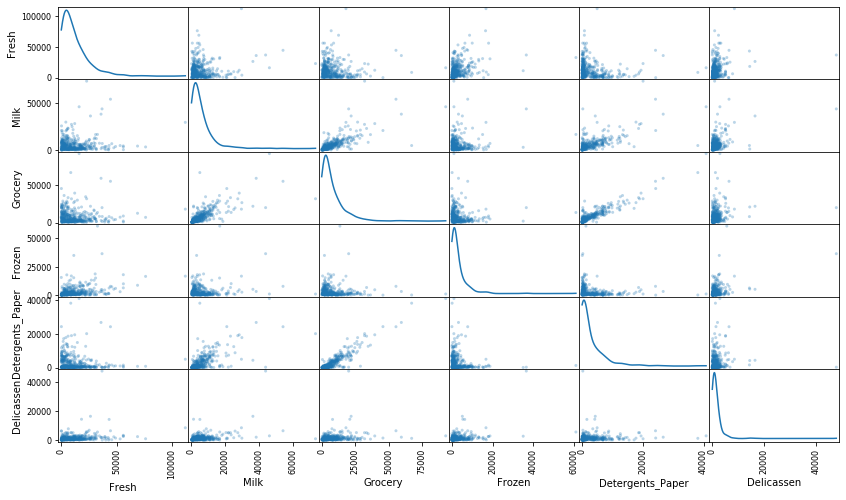

In [16]:
# Produce a scatter matrix and show correlation for each pair of features in the data
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

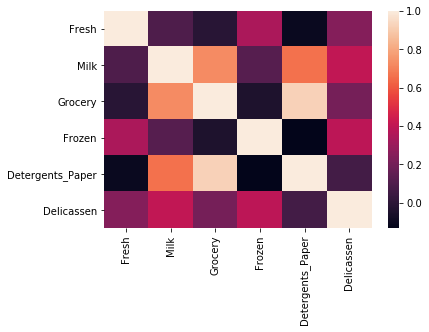

In [17]:
# Display a correlation matrix
import seaborn as sns
sns.heatmap(data.corr())

In [18]:
#Data is not normally distributed, it is positively skewed and it resemeble the log-normal distribution.

#In most plots, most data points lie near the origin which shows little correlation between them.

#There is a strong correlation between the ‘Grocery’ and ‘Detergent_paper’ features.

#Therefore the ‘Grocery’ feature can be accurately predicted with the ‘Detergent_paper’ feature. And, therefore, is not an absolutely necessary feature in the dataset.

## #Data Preprocessing

### Feature Scaling

In [19]:
# Scale the data using the natural logarithm 
log_data = np.log(data) 

In [20]:
# Scale the sample data using the natural logarithm 
log_samples = np.log(samples) 

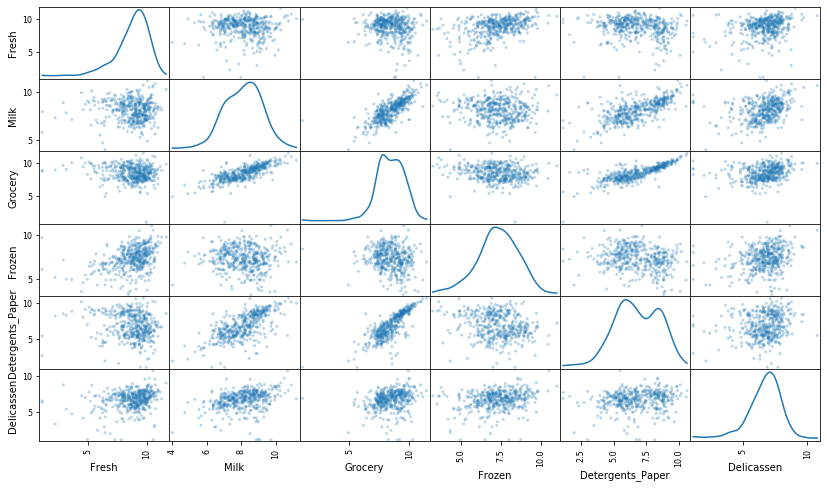

In [21]:
# Produce a scatter matrix for each pair of newly-transformed features 
scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [22]:
#After applying a natural logarithm scaling to the data, the distribution of each feature appear much more normal. For any pairs of features we have identified earlier as being correlated, we observe here that correlation is still present (and whether it is now stronger or weaker than before).

In [23]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


### Outlier Detection

In [24]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
   # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    lista = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [25]:
outliers 

[[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412],
 [86, 98, 154, 356],
 [75, 154],
 [38, 57, 65, 145, 175, 264, 325, 420, 429, 439],
 [75, 161],
 [66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]]

In [26]:
# Detecting outliers that appear in more than one product
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
            seen[index] += 1
dupes = sorted(dupes)
dupes

[65, 66, 75, 128, 154]

In [27]:
# Removing outliers  
good_data = log_data.drop(dupes, axis=0).reset_index(drop=True)

## Feature Transformation

### Principal Component Analysis (PCA)

In [28]:
# Get the shape of the log_samples
log_samples.shape

(3, 6)

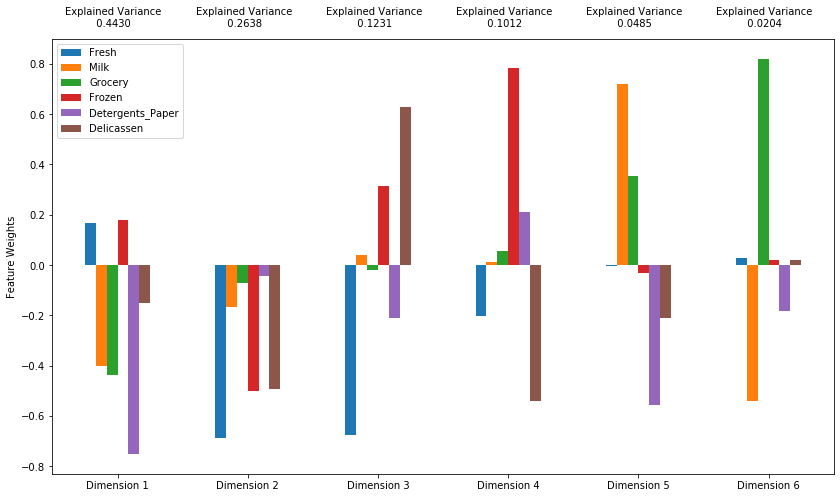

In [29]:
# Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=good_data.shape[1])
pca = pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [30]:
#The variance explained by the first three Principal Components is the 93.11% of the total. 

In [31]:
#Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


### Dimensionality Reduction

In [32]:
#Applying PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

In [33]:
#Tranform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

In [34]:
#Transform log_samples using PCA fit above
pca_samples = pca.transform(log_samples)

In [35]:
#Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension 1', 'Dimension 2'])

In [36]:
#Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns=['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-2.1899,-4.8605
2,3.0206,4.8169


## Clustering

In [37]:
#The chosen algorithm is Gaussian Mixture model because data is not splitted in clear and different clusters, so we do not know how many clusters there are.

In [38]:
# Import the necessary libraries
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,7):
    
    print('Number of clusters: ' + str(i))
        
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(random_state=42, n_components=i)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_
    print('Cluster Center: ' + str(centers))

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    print('Sample predictions: ' + str(sample_preds))

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    scores[i] = score
    print('Silhouette score is: ' + str(score), '\n')
    
print('Scores: ' + str(scores))

Number of clusters: 2
Cluster Center: [[ 1.25648563 -0.17661209]
 [-2.2256852   0.31284314]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42232468264593864 

Number of clusters: 3
Cluster Center: [[-2.12747031 -0.00345018]
 [-1.47131107  0.9302386 ]
 [ 1.33240836 -0.24325007]]
Sample predictions: [1 1 1]
Silhouette score is: 0.3852447193714692 

Number of clusters: 4
Cluster Center: [[-1.62987178 -0.67042181]
 [-2.64869823  1.21463156]
 [ 1.33390526 -0.34578183]
 [ 1.60494287  1.4780565 ]]
Sample predictions: [0 0 3]
Silhouette score is: 0.3458671375116742 

Number of clusters: 5
Cluster Center: [[ 0.3334473  -1.85876158]
 [-2.84695947  1.50466681]
 [ 1.57656601 -0.0981946 ]
 [ 2.22802118  2.64221015]
 [-1.64820678 -0.37300795]]
Sample predictions: [4 0 3]
Silhouette score is: 0.3314244539434991 

Number of clusters: 6
Cluster Center: [[ 0.58724264 -1.84283598]
 [-2.83698866  1.750979  ]
 [ 1.46372735 -0.14070095]
 [ 2.67567304  0.71178899]
 [-1.64502773 -0.44638497]
 [ 1.1543844

In [39]:
#The number of cluster with the best Silhouetter Score is 2, with a score of 0.42

## Cluster Visualization 

In [40]:
scores = {}
for i in range(2,7):
    clusterer = GaussianMixture(random_state=42, n_components=2)
    clusterer.fit(reduced_data)
    
    preds = clusterer.predict(reduced_data)

    centers = clusterer.means_
   
    sample_preds = clusterer.predict(pca_samples)
    
    score = silhouette_score(reduced_data, preds)
    scores[i] = score

print('Cluster Center: ' + str(centers))
print('Sample predictions: ' + str(sample_preds))    
print('Silhouette score is: ' + str(score), '\n')

Cluster Center: [[ 1.25648563 -0.17661209]
 [-2.2256852   0.31284314]]
Sample predictions: [1 1 0]
Silhouette score is: 0.42232468264593864 



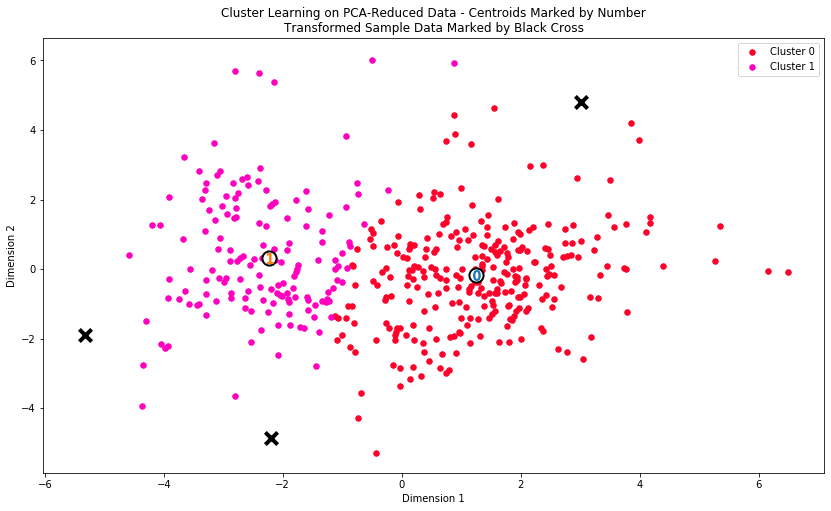

In [41]:
## Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

## Data Recovery

In [42]:
#Since the data is currently reduced in dimension and scaled by a logarithm

#Inverse transform the centers
log_centers = pca.inverse_transform(centers)

#Exponentiate the centers
true_centers = np.exp(log_centers)

#Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


In [43]:
#Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster",pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0
